# **CAPSTONE 3**

| Nama | Ulfatul Aini |
| --- | --- |
| Kelas | JCDS2304-015 |
| Lecture | Andy Hermawan |

## **BUSINESS PROBLEM**

||
| --- |
| Konteks bisnis dari proyek ini adalah sebuah perusahaan e-commerce yang ingin mengetahui pelanggan mana yang berpotensi untuk churn (berhenti berlangganan). Dengan mengetahui ini, perusahaan dapat melakukan pendekatan kepada pelanggan tersebut untuk menawarkan promo atau insentif agar mereka tetap menjadi pelanggan. |

|Permasalahan yang dihadapi|
|-----|
|Perusahaan mengalami kerugian ketika pelanggan churn karena kehilangan pendapatan dari pelanggan tersebut.|
|Biaya untuk mendapatkan pelanggan baru lebih besar daripada mempertahankan pelanggan yang sudah ada.|
|Perlu mengidentifikasi faktor-faktor yang menyebabkan pelanggan churn agar dapat dilakukan tindakan pencegahan.|

|Tujuan yang ingin dicapai|
|---|
|Membangun model machine learning yang dapat memprediksi kemungkinan seorang pelanggan akan churn atau tidak.|
|Menggunakan model tersebut untuk mengidentifikasi pelanggan yang berisiko tinggi untuk churn.|
|Merancang strategi pemasaran atau promosi yang tepat untuk mempertahankan pelanggan berisiko churn tersebut.|


|Stakeholder| 
|----|
|Tim Pemasaran|
|TIm Penjualan|

## **DATA UNDERSTANDING**

**Dataset E-commerce Customer Churn**

Dataset milik perusahaan E-Commerce online terkemuka. Sebuah perusahaan ritel online (E-commerce) ingin mengetahui pelanggan yang akan melakukan churn, sehingga mereka dapat mendekati pelanggan untuk menawarkan beberapa promo.

- Sumber data asli : https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction
- Pembuat data : Ankit Verma
- Tanggal : 16 Februari 2022

**Target and Features**

Target `Churn` : 
- 0 : Customer yang tidak melakukan churn
- 1 : Customer yang melakukan churn

| No. | Feature | Deskripsi |
| --- | --- | --- |
| 1 | Tenure | Lama seorang pelanggan menjadi pelanggan perusahaan tersebut (dalam satuan waktu tertentu, misal bulan atau tahun). |
| 2 | WarehouseToHome | Jarak antara gudang perusahaan dengan rumah pelanggan (dalam satuan tertentu, misal km atau mil). |
| 3 | NumberOfDeviceRegistered | Jumlah total perangkat yang terdaftar untuk pelanggan tertentu. |
| 4 | PreferedOrderCat | Kategori pesanan yang paling disukai oleh pelanggan dalam satu bulan terakhir (misal elektronik, pakaian, makanan, dll). |
| 5 | SatisfactionScore | Skor kepuasan pelanggan terhadap layanan yang diberikan (skala tertentu, misal 1-5 atau 1-10). |
| 6 | MaritalStatus | Status pernikahan pelanggan (single, menikah, bercerai, dll). |
| 7 | NumberOfAddress | Jumlah total alamat yang ditambahkan oleh pelanggan tertentu. |
| 8 | Complaint | Apakah ada keluhan yang diajukan oleh pelanggan dalam satu bulan terakhir (ya/tidak). |
| 9 | DaySinceLastOrder | Jumlah hari sejak pelanggan melakukan pemesanan terakhir. |
| 10 | CashbackAmount | Rata-rata cashback yang diterima pelanggan dalam satu bulan terakhir (dalam satuan mata uang tertentu). |

## **METRICS EVALUATION**

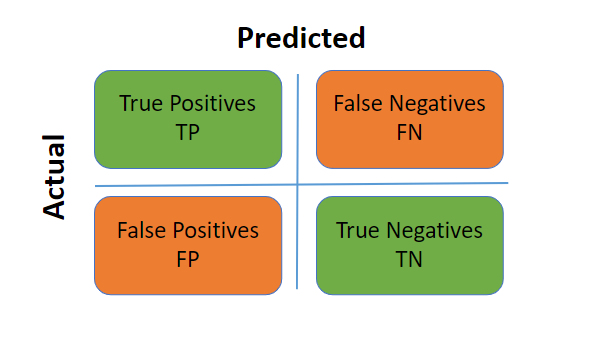

|Metrics Evaluation||
|---|---|
|**True Positive (TP)**| Customer diprediksi dan kenyataannya melakukan churn|
| **False Positive (FP)** |Customer diprediksi melakukan churn, namun pada kenyataannya customer tidak melakukan churn|
| **False Negative (FN)**| Customer diprediksi tidak melakukan churn, namun pada kenyataannya customer melakukan churn|
| **True Negative (TN)**| Customer diprediksi dan kenyataannya tidak melakukan churn|

Model yang dibuat harus dapat mengurangi kerugian perusahaan karena kehilangan customer atau menekan **False Negative**, namun tetap menjaga agar perusahaan tidak mengeluarkan biaya yang tidak tepat sasaran dalam memberikan promosi (False Positive). Oleh karena itu, metric utama yang digunakan yaitu `f2 score`.

`F2 score` adalah salah satu classification evaluation metrics yang mengukur akurasi model dengan mempertimbangkan trade-off antara precision dan recall. `F2 score` didasarkan pada nilai beta di mana beta lebih besar dari 1 memberikan lebih banyak penekanan pada recall daripada precision.
`F2 score` dapat digunakan untuk mengevaluasi performa model klasifikasi di mana kesalahan false negative lebih penting untuk dihindari daripada false positive.

### Meng-Import Library yang diperlukan.

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, RobustScaler, MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from sklearn.preprocessing import PolynomialFeatures

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import RandomizedSearchCV, train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import fbeta_score, make_scorer

import shap

import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

pd.set_option('display.max_columns', None)

### Load Data

In [3]:
data = pd.read_csv('data_ecommerce_customer_churn.csv')
data.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


### Melihat nilai unik pada setiap kolom

In [4]:
for col in data.columns:
    print(f"{col}: {data[col].nunique()} unique values")
    print(data[col].unique())
    print("-" * 30)

Tenure: 36 unique values
[15.  7. 27. 20. 30.  1. 11. 17.  6. 16. 10. nan  8. 19.  0.  3.  5.  9.
 18. 12. 24.  4. 61. 25. 13. 14.  2. 21. 29. 26. 23. 31. 22. 28. 51. 60.
 50.]
------------------------------
WarehouseToHome: 33 unique values
[ 29.  25.  13.  15.  16.  11.  12.   7.  26.  20.  14.   8.  21.  22.
  27.  18.  33.   9.  17.  nan   6.  31.  28.  10.  19.  32.  23.  30.
  35.  34.  24.   5.  36. 127.]
------------------------------
NumberOfDeviceRegistered: 6 unique values
[4 3 6 2 5 1]
------------------------------
PreferedOrderCat: 6 unique values
['Laptop & Accessory' 'Mobile' 'Fashion' 'Others' 'Mobile Phone' 'Grocery']
------------------------------
SatisfactionScore: 5 unique values
[3 1 4 2 5]
------------------------------
MaritalStatus: 3 unique values
['Single' 'Married' 'Divorced']
------------------------------
NumberOfAddress: 14 unique values
[ 2  5  7  8  3  1  9  4 10 11  6 19 22 21]
------------------------------
Complain: 2 unique values
[0 1]
------------

### Memeriksa tipe Data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3747 non-null   float64
 1   WarehouseToHome           3772 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3728 non-null   float64
 9   CashbackAmount            3941 non-null   float64
 10  Churn                     3941 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 338.8+ KB


Terdapat 3 tipe data pada Dataset E-Commerce yaitu : Object, Intiger dan Float.

In [6]:
data.isna().sum()

Tenure                      194
WarehouseToHome             169
NumberOfDeviceRegistered      0
PreferedOrderCat              0
SatisfactionScore             0
MaritalStatus                 0
NumberOfAddress               0
Complain                      0
DaySinceLastOrder           213
CashbackAmount                0
Churn                         0
dtype: int64

### Bentuk DataFrame Sebelum melihat duplikat data

In [7]:
data.shape

(3941, 11)

### Memeriksa Presentase Data yang Duplikat

In [8]:
data.duplicated().sum() / len(data) * 100


17.026135498604415

### Menghapus data duplikat

In [9]:
data = data.drop_duplicates()

### Mengetahui bentuk dataframe data setelah data duplikat dihapus

In [10]:
data.shape

(3270, 11)

### Memeriksa Data Kategorikal

In [11]:
categorical_features = [feature for feature in data.columns if (data[feature].dtypes == 'O')]
categorical_features


['PreferedOrderCat', 'MaritalStatus']

### Memeriksa Data Numerik

In [12]:
numerical_features = [feature for feature in data.columns if ((data[feature].dtypes != 'O') & (feature not in ['Churn']))]
numerical_features


['Tenure',
 'WarehouseToHome',
 'NumberOfDeviceRegistered',
 'SatisfactionScore',
 'NumberOfAddress',
 'Complain',
 'DaySinceLastOrder',
 'CashbackAmount']

### Memeriksa Unique Value pada Data Kategorik

In [13]:
for i in categorical_features:
    print(f'Total unique values in {i}: ', data[i].nunique())
    print(f'Unique values: ', data[i].unique())
    print()

Total unique values in PreferedOrderCat:  6
Unique values:  ['Laptop & Accessory' 'Mobile' 'Fashion' 'Others' 'Mobile Phone' 'Grocery']

Total unique values in MaritalStatus:  3
Unique values:  ['Single' 'Married' 'Divorced']



### Mengubah 'Mobile' menjadi 'Mobile Phone' pada kolom 'PreferedOrderCat'

In [14]:
data['PreferedOrderCat'] = data['PreferedOrderCat'].replace({'Mobile':'Mobile Phone'})

### Validasi Perubahan 'Mobile' menjadi 'Mobile Phone' pada Kolom 'PreferedOrderCat'

In [15]:
data['PreferedOrderCat'].value_counts()

PreferedOrderCat
Laptop & Accessory    1213
Mobile Phone          1183
Fashion                484
Grocery                241
Others                 149
Name: count, dtype: int64

### Melihat distribusi data pada kolom yang terdapat *Missing Value*

Text(0.5, 0.98, 'Frequency Distribution of Tenure, Warehouse to Home, Day Since Last Order')

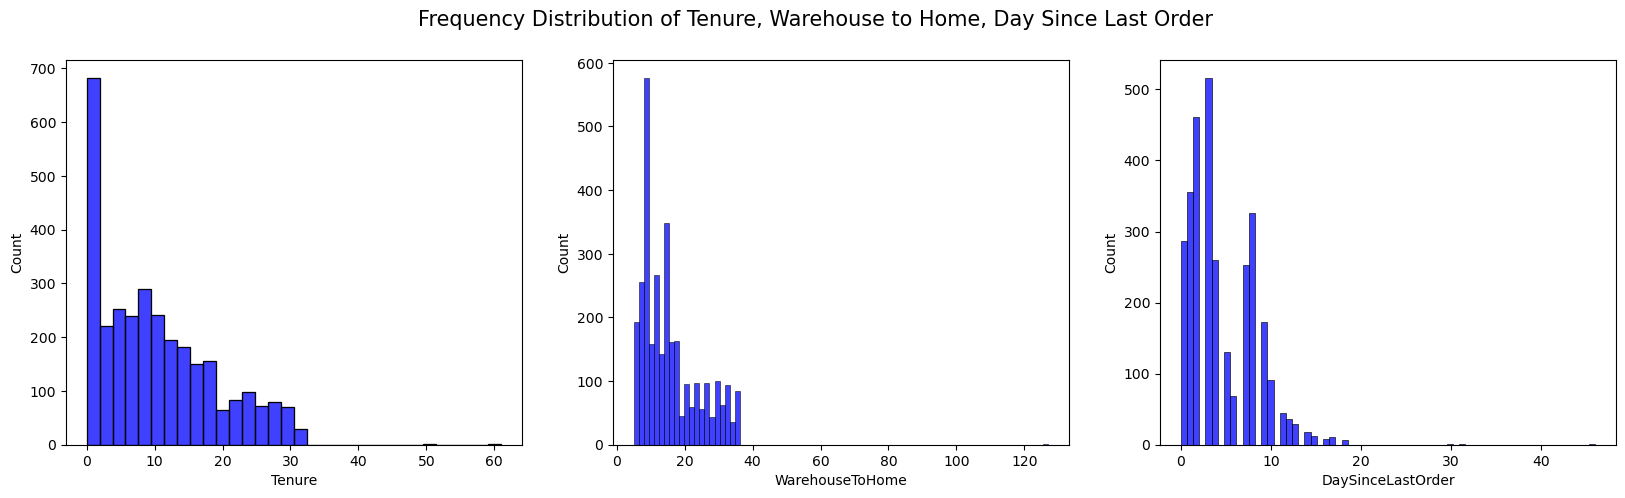

In [16]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
sns.histplot(data=data, x='Tenure', color='blue')

plt.subplot(1,3,2)
sns.histplot(data=data, x='WarehouseToHome', color='blue')

plt.subplot(1,3,3)
sns.histplot(data=data, x='DaySinceLastOrder', color='blue')

plt.suptitle('Frequency Distribution of Tenure, Warehouse to Home, Day Since Last Order', size= 15)

### Memeriksa proporsi target (Churn) 

In [17]:
print(data['Churn'].value_counts())
print()

print(data['Churn'].value_counts()/len(data['Churn'])*100)

Churn
0    2736
1     534
Name: count, dtype: int64

Churn
0    83.669725
1    16.330275
Name: count, dtype: float64


Target **(Churn)** pada dataset ini memiliki proportion of minority class sebesar 16.3% sehingga tergolong **Moderate Imbalance**


| Data Splitting|
|---|
|Data splitting adalah proses membagi dataset menjadi dua atau lebih subset data yang digunakan untuk tujuan yang berbeda dalam proses pemodelan machine learning. Tujuan utama dari data splitting adalah untuk memastikan bahwa model yang dibangun tidak hanya berfungsi dengan baik pada data pelatihan (train data), tetapi juga dapat menggeneralisasi dengan baik pada data baru yang belum pernah dilihat sebelumnya (test data).|

|Secara umum, data splitting dilakukan dengan membagi dataset menjadi dua subset utama||
|---|--|
|1. **Train Data** |Bagian ini digunakan untuk melatih dan membangun model machine learning.|
|2. **Test Data** |Bagian ini digunakan untuk mengevaluasi performa model yang telah dilatih pada data baru yang belum pernah dilihat sebelumnya.|

|Selain itu, terkadang dataset juga dibagi menjadi tiga subset||
|----|--|
|1. **Train Data**| Digunakan untuk melatih model.|
|2. **Validation Data**| Digunakan untuk melakukan tuning hyperparameter dan memilih model terbaik.|
|3. **Test Data**| Digunakan untuk mengevaluasi performa akhir dari model terbaik pada data baru.|

### Mendefinisikan Feature (X) dan Target (y)

In [18]:
X = data.drop('Churn', axis=1)
y = data['Churn']

### Melakukan data splitting menjadi Data Train dan Data test

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

|Menggunakan fungsi train_test_split dari library Scikit-learn untuk membagi data menjadi train dan test sets.|
|----|
|`test_size=0.2` berarti 20% dari data akan menjadi test set, dan sisanya (80%) menjadi train set.|
|`random_state=0` digunakan untuk memastikan hasil splitting data akan selalu sama.|

## **PREPROCESSING**

|Preprocessing|
|----|
|Tahap preprocessing data adalah serangkaian proses yang dilakukan pada data mentah sebelum data tersebut digunakan untuk membangun model machine learning. Tujuan utama dari preprocessing data adalah untuk mempersiapkan data agar siap digunakan dalam pemodelan machine learning dengan cara menangani masalah-masalah yang umum terjadi pada data seperti missing values, outlier, scaling, dan lain-lain.||

|**Impute *Missing Value***|
|---|
|Menggunakan nilai Median untuk kolom: `Tenure`, `WarehouseToHome`, `DaySinceLastOrder`|
|Pada tahap eksplorasi data sebelumnya, ditemukan bahwa kolom `Tenure`, `WarehouseToHome`, dan `DaySinceLastOrder` memiliki nilai yang hilang dan distribusinya tidak normal. Oleh karena itu, imputasi dilakukan menggunakan nilai median.|


|**Scaling**|
|---|
|Menggunakan `Robust Scaler` untuk kolom: *Tenure*, *WarehouseToHome*, *NumberOfDeviceRegistered*, *SatisfactionScore*, *NumberOfAddress*, *DaySinceLastOrder*, *CashbackAmount*|
|Fitur numerik tersebut memiliki data outliers sehingga penggunaan Robust Scaler yang dapat menangani outliers lebih sesuai. Fitur 'Complain' memiliki nilai 0 dan 1, sehingga tidak memerlukan scaling.|

|**Encoding**|
|---|
|Menggunakan `One Hot Encoder` untuk kolom: *PreferedOrderCat*, *MaritalStatus*|
|Dari tahap eksplorasi data, diketahui bahwa *PreferedOrderCat* dan *MaritalStatus* adalah fitur kategorikal. Oleh karena itu, encoding dilakukan untuk mengubahnya menjadi data numerik. One Hot Encoder digunakan karena fitur-fitur ini tidak memiliki urutan atau tingkatan (non-ordinal) dan memiliki jumlah nilai unik yang sedikit. *PreferedOrderCat* memiliki 5 nilai unik, dan *MaritalStatus* memiliki 3 nilai unik.|


|**Polynomial Features**|
|----|
|Mengubah fitur menjadi polinomial yang lebih tinggi dengan harapan dapat meningkatkan performa model.|

### **Impute Missing Value pada Data Train dan Data Test**

In [20]:
pipe_impute_robust = Pipeline([
    ('median', SimpleImputer(strategy='median')),
    ('poly', PolynomialFeatures(degree=2)),
    ('scaler', RobustScaler())
])

In [21]:
transformer = ColumnTransformer([
    ('pipe_impute_robust', pipe_impute_robust, ['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered', 
                                                'SatisfactionScore', 'NumberOfAddress', 'DaySinceLastOrder', 
                                                'CashbackAmount']),
    ('onehot', OneHotEncoder(drop='first'), ['PreferedOrderCat', 'MaritalStatus'])
], remainder='passthrough')

transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipe_impute_robust',
                                 Pipeline(steps=[('median',
                                                  SimpleImputer(strategy='median')),
                                                 ('poly', PolynomialFeatures()),
                                                 ('scaler', RobustScaler())]),
                                 ['Tenure', 'WarehouseToHome',
                                  'NumberOfDeviceRegistered',
                                  'SatisfactionScore', 'NumberOfAddress',
                                  'DaySinceLastOrder', 'CashbackAmount']),
                                ('onehot', OneHotEncoder(drop='first'),
                                 ['PreferedOrderCat', 'MaritalStatus'])])

## **BENCHMARK MODEL**

### Algoritma Machine Learning

In [22]:
logreg = LogisticRegression(random_state=0, class_weight='balanced')
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(random_state=0, class_weight='balanced') 
rf = RandomForestClassifier(random_state=0, class_weight='balanced') 
ada = AdaBoostClassifier(tree, random_state=0)
gbc = GradientBoostingClassifier(random_state=0)
xgbc = XGBClassifier(random_state=0, verbosity=0, class_weight='balanced')

### Resampler

In [23]:
smote = SMOTE(random_state=42)
nearmiss = NearMiss()
rus = RandomUnderSampler(random_state=42)
ros = RandomOverSampler(random_state=42)

In [24]:
models = [logreg, knn, tree, rf, ada, gbc, xgbc]
score = []
list_mean = []
list_std = []

f2_score = make_scorer(fbeta_score, beta=2)

for i in models:

    pipe_model = Pipeline([
        ('transformer', transformer),
        ('resampler', smote),
        ('model', i)
    ])

    model_cv = cross_val_score(
        estimator = pipe_model, 
        X= X_train, 
        y= y_train, 
        cv=5, 
        scoring= f2_score, 
        error_score='raise'
        )

    score.append(model_cv)
    list_mean.append(model_cv.mean())
    list_std.append(model_cv.std())

### membuat data frame mean dan std dari setiap algoritma yang dilooping

In [25]:
data_hl = pd.DataFrame({
    'model':['logreg', 'knn', 'tree', 'rf',' ada', 'gbc', 'xgbc'],
    'mean':list_mean,
    'std':list_std
})

data_hl.sort_values(by='mean', ascending=False)

,model,mean,std
0,logreg,0.689482,0.039110
3,rf,0.672430,0.043809
5,gbc,0.670938,0.035855
6,xgbc,0.668631,0.049804
1,knn,0.645309,0.015036
2,tree,0.610331,0.050071
4,ada,0.603017,0.062443


Berdasarkan hasil mean dan standar deviasi dari setiap model atau algoritma yang ditunjukkan pada gambar, dua model dengan penilaian terbaik adalah Logistic Regression (logreg) dan Random Forest (rf). Berikut adalah alasan pemilihannya:

1. **Logistic Regression (logreg)**
   - **Mean:** 0.689482
   - **Standard Deviation (std):** 0.039110

   Logistic Regression memiliki mean tertinggi (0.689482) di antara semua model yang dibandingkan. Hal ini menunjukkan bahwa model ini memberikan performa rata-rata terbaik. Selain itu, standar deviasinya (0.039110) adalah yang paling rendah, yang berarti bahwa variasi dalam performa model ini juga sangat kecil, menunjukkan konsistensi yang sangat baik.

2. **Random Forest (rf)**
   - **Mean:** 0.672430	
   - **Standard Deviation (std):** 0.043809

   K-Nearest Neighbors memiliki mean kedua tertinggi (0.672430), menunjukkan performa yang kuat. Standar deviasinya (0.043809) masih cukup rendah, menunjukkan bahwa model ini cukup konsisten dalam performanya.

**Alasan Pemilihan:**

- **Mean Tertinggi:** Kedua model ini memiliki mean yang paling tinggi, yang berarti mereka cenderung memberikan prediksi yang lebih akurat dibandingkan dengan model lainnya.
- **Stabilitas:** Standar deviasi yang rendah menunjukkan bahwa performa model konsisten dan tidak banyak bervariasi ketika digunakan pada data yang berbeda. Logistic Regression, khususnya, menunjukkan kombinasi mean yang tinggi dan standar deviasi yang sangat rendah, membuatnya menjadi pilihan terbaik secara keseluruhan.

## **HYPERPARAMETER TUNING**

### `Logistic Regression`

### Tuning Logistic Regression

In [26]:
hyperparam_space_logreg = {
    'balancing': [smote, rus, ros, nearmiss, None],
    'model__C': list(np.logspace(-4, 4, 20)),
    'model__penalty': ['l1', 'l2'],
    'model__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'model__class_weight': ['balanced', None],
    'transformer__pipe_impute_robust__scaler': [MinMaxScaler(), StandardScaler(), RobustScaler()],
    'transformer__pipe_impute_robust__poly__degree': [1, 2, 3]
}

In [27]:
logreg = LogisticRegression(random_state=0, class_weight='balanced')

pipe_model = Pipeline([
        ('transformer', transformer),
        ('balancing', smote),
        ('model', logreg)
        ])

random_logreg = RandomizedSearchCV(
    estimator=pipe_model,
    param_distributions=hyperparam_space_logreg,
    cv=5,
    scoring=f2_score,
    n_jobs=-1,
    random_state=0,
    n_iter=1000
)

In [28]:
random_logreg.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('pipe_impute_robust',
                                                                               Pipeline(steps=[('median',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('poly',
                                                                                                PolynomialFeatures()),
                                                                                               ('scaler',
                                                                                                RobustScaler())]),
                                                                               ['Tenure',
                                                                                'WarehouseToHome',
                                                                                'NumberOfDeviceRegistered',
                                                                                'SatisfactionScore',
                                                                                'NumberOfAddre...
                                                     3792.690190732246,
                                                     10000.0],
                                        'model__class_weight': ['balanced',
                                                                None],
                                        'model__penalty': ['l1', 'l2'],
                                        'model__solver': ['newton-cg', 'lbfgs',
                                                          'liblinear', 'sag',
                                                          'saga'],
                                        'transformer__pipe_impute_robust__poly__degree': [1,
                                                                                          2,
                                                                                          3],
                                        'transformer__pipe_impute_robust__scaler': [MinMaxScaler(),
                                                                                    StandardScaler(),
                                                                                    RobustScaler()]},
                   random_state=0, scoring=make_scorer(fbeta_score, beta=2))

In [29]:
pd.DataFrame(random_logreg.cv_results_).sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_transformer__pipe_impute_robust__scaler,param_transformer__pipe_impute_robust__poly__degree,param_model__solver,param_model__penalty,param_model__class_weight,param_model__C,param_balancing,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
206,10.890302,1.102981,0.020401,0.006374,StandardScaler(),3,liblinear,l1,balanced,1.623777,RandomOverSampler(random_state=42),{'transformer__pipe_impute_robust__scaler': St...,0.761317,0.678337,0.789474,0.691489,0.720339,0.728191,0.041826,1
799,9.698886,1.231649,0.023500,0.003157,RobustScaler(),3,liblinear,l1,balanced,1.623777,RandomOverSampler(random_state=42),{'transformer__pipe_impute_robust__scaler': Ro...,0.764463,0.656455,0.789474,0.690021,0.708245,0.721732,0.048710,2
47,1.740743,0.160019,0.023600,0.001854,StandardScaler(),3,newton-cg,l2,balanced,29.763514,None,{'transformer__pipe_impute_robust__scaler': St...,0.766046,0.646930,0.778947,0.708245,0.691489,0.718331,0.048726,3
253,1.633530,0.171469,0.019600,0.003826,RobustScaler(),3,liblinear,l2,balanced,11.288379,RandomOverSampler(random_state=42),{'transformer__pipe_impute_robust__scaler': Ro...,0.762004,0.637363,0.797872,0.688172,0.686695,0.714421,0.057661,4
467,52.869668,5.189860,0.026613,0.004764,RobustScaler(),3,liblinear,l1,None,29.763514,RandomOverSampler(random_state=42),{'transformer__pipe_impute_robust__scaler': Ro...,0.782241,0.615551,0.782241,0.677419,0.671642,0.705819,0.066036,5


In [30]:
print('Logistic Regression')
print('Best_score:', random_logreg.best_score_)
print('Best_params:', random_logreg.best_params_)

Logistic Regression
Best_score: 0.7281911763395662
Best_params: {'transformer__pipe_impute_robust__scaler': StandardScaler(), 'transformer__pipe_impute_robust__poly__degree': 3, 'model__solver': 'liblinear', 'model__penalty': 'l1', 'model__class_weight': 'balanced', 'model__C': 1.623776739188721, 'balancing': RandomOverSampler(random_state=42)}


### `Random Forest`

#### Tuning Random Forest

In [31]:
hyperparam_space_rf = {
    'balancing':[smote, rus, ros, nearmiss, None],
    'model__max_depth': list(np.arange(1,100,2)), 
    'model__n_estimators': list(np.arange(1,100,2)),
    'model__max_features': ['auto', 'sqrt', 'log2'],
    'model__min_samples_leaf': list(np.arange(1,100,2)),
    'model__min_samples_split': list(np.arange(1,100,2)),
    'transformer__pipe_impute_robust__scaler': [MinMaxScaler(), StandardScaler(), RobustScaler()],
    'transformer__pipe_impute_robust__poly__degree': [1,2,3]
}

In [32]:
rf = RandomForestClassifier(random_state=0, class_weight='balanced') 

pipe_model = Pipeline([
        ('transformer', transformer),
        ('balancing', smote), 
        ('model', rf)
        ])

random_rf = RandomizedSearchCV(
    estimator = pipe_model, 
    param_distributions = hyperparam_space_rf, 
    cv = 5, 
    scoring = f2_score, 
    n_jobs = -1,  
    random_state=0,
    n_iter= 1000
)

In [33]:
random_rf.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('pipe_impute_robust',
                                                                               Pipeline(steps=[('median',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('poly',
                                                                                                PolynomialFeatures()),
                                                                                               ('scaler',
                                                                                                RobustScaler())]),
                                                                               ['Tenure',
                                                                                'WarehouseToHome',
                                                                                'NumberOfDeviceRegistered',
                                                                                'SatisfactionScore',
                                                                                'NumberOfAddre...
                                                                     39, 41, 43,
                                                                     45, 47, 49,
                                                                     51, 53, 55,
                                                                     57, 59, ...],
                                        'model__n_estimators': [1, 3, 5, 7, 9,
                                                                11, 13, 15, 17,
                                                                19, 21, 23, 25,
                                                                27, 29, 31, 33,
                                                                35, 37, 39, 41,
                                                                43, 45, 47, 49,
                                                                51, 53, 55, 57,
                                                                59, ...],
                                        'transformer__pipe_impute_robust__poly__degree': [1,
                                                                                          2,
                                                                                          3],
                                        'transformer__pipe_impute_robust__scaler': [MinMaxScaler(),
                                                                                    StandardScaler(),
                                                                                    RobustScaler()]},
                   random_state=0, scoring=make_scorer(fbeta_score, beta=2))

In [34]:
pd.DataFrame(random_rf.cv_results_).sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_transformer__pipe_impute_robust__scaler,param_transformer__pipe_impute_robust__poly__degree,param_model__n_estimators,param_model__min_samples_split,param_model__min_samples_leaf,param_model__max_features,param_model__max_depth,param_balancing,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
69,0.783864,0.082946,0.071605,0.041665,RobustScaler(),1,59,37,3,sqrt,53,RandomOverSampler(random_state=42),{'transformer__pipe_impute_robust__scaler': Ro...,0.812918,0.728477,0.770065,0.756579,0.728477,0.759303,0.031299,1
550,0.374378,0.052369,0.049486,0.012329,StandardScaler(),1,37,31,23,sqrt,35,RandomOverSampler(random_state=42),{'transformer__pipe_impute_robust__scaler': St...,0.799136,0.706522,0.786164,0.726316,0.723542,0.748336,0.037040,2
674,1.209295,0.051600,0.023802,0.001168,RobustScaler(),2,43,11,13,sqrt,51,RandomOverSampler(random_state=42),{'transformer__pipe_impute_robust__scaler': Ro...,0.799550,0.694761,0.782998,0.742794,0.720621,0.748145,0.038712,3
42,0.687057,0.197225,0.087007,0.013040,MinMaxScaler(),1,39,55,13,sqrt,9,RandomOverSampler(random_state=42),{'transformer__pipe_impute_robust__scaler': Mi...,0.769231,0.711160,0.786164,0.721868,0.731441,0.743973,0.028776,4
593,0.549317,0.059193,0.028329,0.007212,StandardScaler(),2,41,17,11,auto,53,RandomOverSampler(random_state=42),{'transformer__pipe_impute_robust__scaler': St...,0.801354,0.699541,0.781938,0.712695,0.722222,0.743550,0.040395,5


In [35]:
print('Random Forest')
print('Best_score:', random_rf.best_score_)
print('Best_params:', random_rf.best_params_)

Random Forest
Best_score: 0.7593030520658448
Best_params: {'transformer__pipe_impute_robust__scaler': RobustScaler(), 'transformer__pipe_impute_robust__poly__degree': 1, 'model__n_estimators': 59, 'model__min_samples_split': 37, 'model__min_samples_leaf': 3, 'model__max_features': 'sqrt', 'model__max_depth': 53, 'balancing': RandomOverSampler(random_state=42)}


## **BEST MODEL**

In [36]:
print(data_hl[data_hl['model']=='logreg']['mean'].values[0], 'Logistic Regression Benchmark')
print(random_logreg.best_score_, 'Logistic Regression Tuning')

print(data_hl[data_hl['model']=='rf']['mean'].values[0], 'Random Forest Benchmark')
print(random_rf.best_score_, 'Random Forest Tuning')

0.6894820806366571 Logistic Regression Benchmark
0.7281911763395662 Logistic Regression Tuning
0.6724298661420887 Random Forest Benchmark
0.7593030520658448 Random Forest Tuning


### Before Hyperparameter Tuning

In [37]:
model = RandomForestClassifier(random_state=0, class_weight='balanced') 

model_pipe = Pipeline([
        ('transformer', transformer),
        ('balancing', smote), 
        ('model', model)
        ])

model_pipe.fit(X_train, y_train)

y_pred = model_pipe.predict(X_test)

f2score_rf_benchmark = fbeta_score(y_test, y_pred, beta=2)
f2score_rf_benchmark

0.6648936170212766

### After Hyperparameter Tuning

In [38]:
rf_tuning = random_rf.best_estimator_

rf_tuning.fit(X_train, y_train)

y_pred_rf_tuning = rf_tuning.predict(X_test)

f2score_rf_tuning = fbeta_score(y_test, y_pred_rf_tuning, beta=2)
f2score_rf_tuning

0.7377049180327869

In [39]:
print(f2score_rf_benchmark, 'F2 Score Random Forest Benchmark')
print(f2score_rf_tuning, 'F2 Score Random Forest Tuning')

0.6648936170212766 F2 Score Random Forest Benchmark
0.7377049180327869 F2 Score Random Forest Tuning


### Confusion Matrix

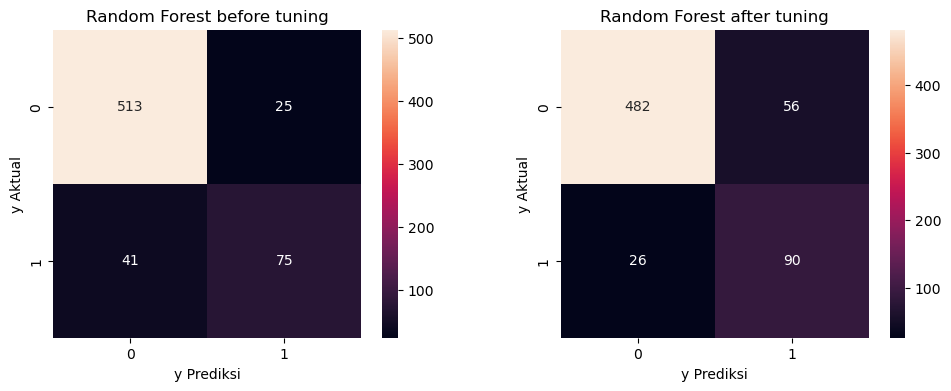

In [40]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.0f', square=True)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.title('Random Forest before tuning')

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test, y_pred_rf_tuning), annot=True, fmt='.0f', square=True)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.title('Random Forest after tuning');

|**Matriks (Random Forest) Sebelum Tuning**||
|---|--|
| True Positives (TP)| 75|
| False Positives (FP)| 25|
| True Negatives (TN)| 513|
| False Negatives (FN)| 41|

|**Matriks (Random Forest) Setelah Tuning**||
|----|---|
| True Positives (TP)| 90|
| False Positives (FP)| 56|
| True Negatives (TN)| 482|
| False Negatives (FN)| 26|

In [41]:
# Matriks Sebelum Tuning
TP_before = 75
FP_before = 25
TN_before = 513
FN_before = 41

# Matriks Setelah Tuning
TP_after = 90
FP_after = 56
TN_after = 482
FN_after = 26

# Total pelanggan
total_customers = 654

### Metrics Score `Before Tuning`

In [42]:
accuracy_before = (TP_before + TN_before) / (TP_before + FP_before + TN_before + FN_before*100)
recall_before = round(TP_before / (TP_before + FN_before)*100)
error_rate_before = round((FP_before + FN_before) / (TP_before + FP_before + TN_before + FN_before) * 100)

print('Metrics Score Before Tuning')
print(f'Accuracy Score menggunakan Random Forest sebelum di tuning adalah {accuracy_before:.2f} %')
print(f'Recall Score menggunakan Random Forest sebelum di tuning adalah {recall_before} %')
print(f'Error Rate menggunakan Random Forest sebelum di tuning adalah {error_rate_before} %')

Metrics Score Before Tuning
Accuracy Score menggunakan Random Forest sebelum di tuning adalah 0.12 %
Recall Score menggunakan Random Forest sebelum di tuning adalah 65 %
Error Rate menggunakan Random Forest sebelum di tuning adalah 10 %


### Metrics Score `After Tuning`

In [43]:
accuracy_after = round((TP_after + TN_after) / (TP_after + FP_after + TN_after + FN_after)*100)
recall_after = round(TP_after / (TP_after + FN_after)*100)
error_rate_after = round ((FP_after + FN_after) / (TP_after + FP_after + TN_after + FN_after)*100)

print('Metrics Score After Tuning')
print(f'Accuracy Score menggunakan Random Forest setelah di tuning adalah {accuracy_after} %')
print(f'Recall Score menggunakan Random Forest setelah di tuning adalah {recall_after} %')
print(f'Error Rate menggunakan Random Forest setelah di tuning adalah {error_rate_after} %')

Metrics Score After Tuning
Accuracy Score menggunakan Random Forest setelah di tuning adalah 87 %
Recall Score menggunakan Random Forest setelah di tuning adalah 78 %
Error Rate menggunakan Random Forest setelah di tuning adalah 13 %


## **IMPACT BUSINESS**

In [62]:
# Perkiraan biaya
cost_FP = 150
cost_FN = 575

### Prediksi jika  Perusahaan `tidak` menggunakan Prediksi Machine Learning

In [63]:
total_promotion_cost_without_ml = total_customers * 150
churn_customers = TP_before + FN_before
promotion_cost_targeted = churn_customers * 150
wasted_cost_without_ml = total_promotion_cost_without_ml - promotion_cost_targeted

wasted_cost_without_ml

80700

### Prediksi jika Perusahaan menggunakan `Prediksi Machine Learning`

In [64]:
cost_FP_after = FP_after * cost_FP
cost_FN_after = FN_after * cost_FN
total_loss_with_ml = cost_FP_after + cost_FN_after

total_loss_with_ml

23350

### Pengurangan Kerugian dengan Machine Learning

In [65]:
cost_reduction = wasted_cost_without_ml - total_loss_with_ml
percentage_reduction = (cost_reduction / wasted_cost_without_ml) * 100
print(f"Persentase Pengurangan Kerugian: {percentage_reduction:.2f}%")

Persentase Pengurangan Kerugian: 71.07%


In [66]:
print("\nImpact Bisnis:")
print(f"Total Biaya Promosi Tanpa Machine Learning: ${total_promotion_cost_without_ml}")
print(f"Biaya Promosi Tepat Sasaran Tanpa Machine Learning: ${promotion_cost_targeted}")
print(f"Biaya Promosi Tidak Tepat Sasaran Tanpa Machine Learning: ${wasted_cost_without_ml}")
print(f"Total Kerugian dengan Machine Learning: ${total_loss_with_ml}")
print(f"Pengurangan Kerugian: ${cost_reduction}")
print(f"Persentase Pengurangan Kerugian: {percentage_reduction:.2f}%")


Impact Bisnis:
Total Biaya Promosi Tanpa Machine Learning: $98100
Biaya Promosi Tepat Sasaran Tanpa Machine Learning: $17400
Biaya Promosi Tidak Tepat Sasaran Tanpa Machine Learning: $80700
Total Kerugian dengan Machine Learning: $23350
Pengurangan Kerugian: $57350
Persentase Pengurangan Kerugian: 71.07%


**Type 1 error**: False Positive 
- Action: Memberikan promosi dengan perkiraan cost sebesar *$150* per capita per tahun.
- Konsekuensi: Memberikan promo pada target yang salah, sehingga perusahaan mengeluarkan biaya yang tidak tepat

 **Type 2 error**: False Negative
- Action: Tidak memberi perhatian pada customer ini yang kita prediksi tidak akan melakukan churn, dan dapat memberikan profit kepada perusahan dengan perkiraan cost *$575 per capita per tahun.
- Konsekuensi: Perusahaan mengalami kerugian karena kehilangan customer yang memberikan profit bagi perusahaan
<br>
<br>
- Cost FP : $ 150
- Cost FN : $ 575

### Kesimpulan

Dengan menggunakan machine learning, perusahaan dapat mengurangi kerugian dari biaya promosi yang tidak tepat sasaran secara signifikan. Berikut rincian kerugian dan pengurangan:

- **Kerugian tanpa machine learning:** `$80,700`
- **Kerugian dengan machine learning:** `$23,350`
- **Pengurangan kerugian:** `$57,350` (sekitar 71.07%)

### Ringkasan

Menggunakan machine learning membantu perusahaan untuk mengurangi biaya promosi yang tidak tepat sasaran dan fokus pada pelanggan yang benar-benar akan churn, sehingga mengurangi kerugian finansial secara signifikan dengan persentase pengurangan kerugian sebesar sekitar `71.07%`.

## **Explainable Machine Learning**

### Feature Importance

### Melihat nilai dari Feature Importance

In [67]:
rf_tuning['model'].feature_importances_

array([0.        , 0.40830349, 0.06469282, 0.03224926, 0.0497953 ,
       0.05235044, 0.0602195 , 0.1200175 , 0.00599228, 0.0232832 ,
       0.03838032, 0.00251774, 0.01927158, 0.02264942, 0.10027715])

### terdapat konstanta = 1 hasil dari polynomial

In [68]:
rf_tuning['transformer'].transformers_[0][1][1].get_feature_names_out()

array(['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6'], dtype=object)

### nama features berdasarkan urutan dari proses transform

In [69]:
feat_scale = rf_tuning['transformer'].transformers_[0][2]
feat_onehot = list(rf_tuning['transformer'].transformers_[1][1].get_feature_names_out())
feat_remainder = list(X.columns[rf_tuning['transformer'].transformers_[2][2]])

feat = [1] + feat_scale + feat_onehot + feat_remainder
feat

[1,
 'Tenure',
 'WarehouseToHome',
 'NumberOfDeviceRegistered',
 'SatisfactionScore',
 'NumberOfAddress',
 'DaySinceLastOrder',
 'CashbackAmount',
 'PreferedOrderCat_Grocery',
 'PreferedOrderCat_Laptop & Accessory',
 'PreferedOrderCat_Mobile Phone',
 'PreferedOrderCat_Others',
 'MaritalStatus_Married',
 'MaritalStatus_Single',
 'Complain']

### data frame feature importance yang diurutkan berdasarkan nilai importance yang paling tinggi

In [70]:
imp = pd.DataFrame({
    'feature':feat,
    'importance':rf_tuning['model'].feature_importances_
}).sort_values('importance', ascending=False)

imp

,feature,importance
1,Tenure,0.408303
7,CashbackAmount,0.120018
14,Complain,0.100277
2,WarehouseToHome,0.064693
6,DaySinceLastOrder,0.060219
5,NumberOfAddress,0.052350
4,SatisfactionScore,0.049795
10,PreferedOrderCat_Mobile Phone,0.038380
3,NumberOfDeviceRegistered,0.032249
9,PreferedOrderCat_Laptop & Accessory,0.023283


### Membuat barplot untuk melakukan visualisasi terhadap feature importance

Text(0.5, 1.0, 'Feature Importance')

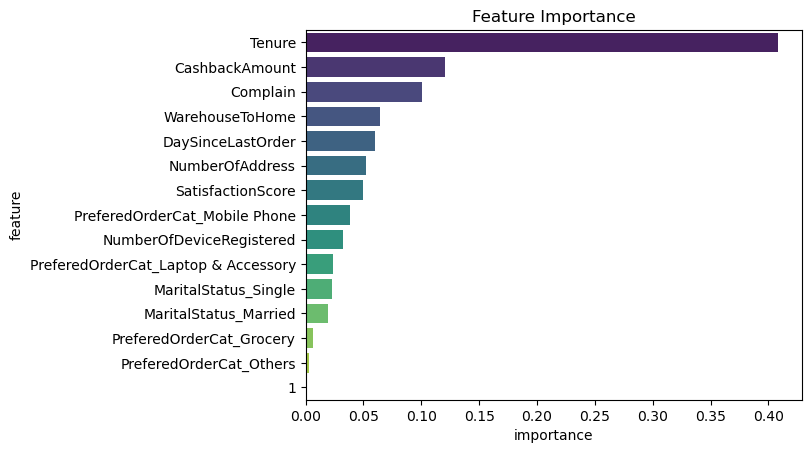

In [71]:
palette = sns.color_palette("viridis", n_colors=len(imp))
sns.barplot(data=imp, y='feature', x='importance', palette=palette)
plt.title('Feature Importance')

Berdasarkan visualisasi "Feature Importance" yang ditampilkan pada grafik batang horizontal, kita dapat menyimpulkan beberapa hal penting mengenai faktor-faktor yang paling berpengaruh dalam model yang digunakan:

1. `Tenure` (Lama seorang menjadi pelanggan) memiliki pengaruh terbesar dalam model ini, dengan importance value yang sangat tinggi mendekati 0.40. Ini menunjukkan bahwa durasi seseorang menjadi pelanggan adalah faktor paling menentukan dalam model ini.
   
2. `CashbackAmount` (jumlah cashback) juga memiliki pengaruh signifikan, dengan importance value yang lebih dari 0.15. Ini menunjukkan bahwa jumlah cashback yang diterima oleh pelanggan juga merupakan faktor penting.
   
3. `Complain` (keluhan) menempati urutan ketiga dalam hal pentingnya, dengan nilai di sekitar 0.15, yang menunjukkan bahwa keluhan pelanggan adalah variabel yang berpengaruh dalam model ini.
   
4. `WarehouseToHome` (jarak dari gudang ke rumah), `DaySinceLastOrder` (hari sejak pesanan terakhir), dan `SatisfactionScore` (skor kepuasan) juga memiliki pengaruh yang cukup signifikan, dengan nilai importance di antara 0.05 dan 0.10. Ini menunjukkan bahwa faktor-faktor ini juga penting, meskipun tidak sebesar tiga faktor teratas.
   
5. `NumberOfAddress` (jumlah alamat), `PreferedOrderCat_Mobile Phone` (kategori pesanan yang disukai: ponsel), dan `NumberOfDeviceRegistered` (jumlah perangkat yang terdaftar) memiliki nilai importance yang lebih rendah tetapi masih berkontribusi dalam model.
   
6. `MaritalStatus_Married` (status pernikahan: menikah) dan `MaritalStatus_Single` (status pernikahan: lajang) menunjukkan pengaruh yang relatif kecil dalam model ini.
   
7. Variabel lainnya seperti `PreferedOrderCat_Laptop & Accessory`, `PreferedOrderCat_Grocery`, dan `PreferedOrderCat_Others` memiliki pengaruh yang paling kecil dalam model ini.

**Secara keseluruhan, dari visualisasi ini dapat disimpulkan bahwa faktor-faktor seperti durasi menjadi pelanggan `Tenure`, jumlah cashback `CashbackAmount`, dan keluhan pelanggan `Complain` adalah faktor yang paling berpengaruh dalam model yang digunakan, sementara faktor lainnya berperan lebih sedikit.**

### Save with Pickle
Pickle adalah salah satu library yang bisa digunakan untuk menyimpan model Machine Learning yang sudah dibuat.

In [72]:
import pickle

In [73]:
# best model
rf_tuning = random_rf.best_estimator_
rf_tuning

# fit
rf_tuning.fit(X, y)

# save with pickle
pickle.dump(rf_tuning, open('finalmodel_rf.sav', 'wb'))

## **Prediction to Customer with Final Model**

### Load Model

In [74]:
model = pickle.load(open('finalmodel_rf.sav', 'rb'))
model

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipe_impute_robust',
                                                  Pipeline(steps=[('median',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('poly',
                                                                   PolynomialFeatures(degree=1)),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['Tenure', 'WarehouseToHome',
                                                   'NumberOfDeviceRegistered',
                                                   'SatisfactionScore',
                                                   'NumberOfAddress',
                                                   'DaySinceLastOrder',
                                                   'CashbackAmount']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['PreferedOrderCat',
                                                   'MaritalStatus'])])),
                ('balancing', RandomOverSampler(random_state=42)),
                ('model',
                 RandomForestClassifier(class_weight='balanced', max_depth=53,
                                        min_samples_leaf=3,
                                        min_samples_split=37, n_estimators=59,
                                        random_state=0))])

### **Prediction to Customer in Dataset**

### Customer index 10 yang akan diprediksi

In [75]:
X.iloc[[17], :]

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount
17,8.0,22.0,4,Fashion,2,Divorced,3,0,6.0,204.78


### **Melakukan predict pada seorang customer**

In [76]:
model.predict(X.iloc[[17], :])

array([1], dtype=int64)

#### Customer index 17 diprediksi `churn`

### **Validasi hasil Prediksi**

In [77]:
# y actual = 1 (Churn)
y[17]

1

#### Prediksi di atas ternyata benar. Customer index 17 `churn` (TP)

### **Prediction to New Customer**

### Membuat customer baru dengan memasukkan data-data customer baru pada dataframe

In [78]:
new_customer = pd.DataFrame({
    'Tenure':[5],
    'WarehouseToHome':[22],
    'NumberOfDeviceRegistered':[3],
    'PreferedOrderCat':['Fashion'],
    'SatisfactionScore':[3],
    'MaritalStatus':['Single'],
    'NumberOfAddress':[10],
    'Complain':[0],
    'DaySinceLastOrder':[11],
    'CashbackAmount':[155]
})
new_customer

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount
0,5,22,3,Fashion,3,Single,10,0,11,155


### Melakukan predict pada seorang customer baru 

In [79]:
model.predict(new_customer)

array([0], dtype=int64)

#### Customer baru diprediksi `tidak churn`

## **CONCLUSION AND RECOMMENDATION**

### Kesimpulan

Berdasarkan hasil analisis model Random Forest, penggunaan machine learning dapat secara signifikan mengurangi kerugian dari biaya promosi yang tidak tepat sasaran. Berikut adalah rincian kerugian dan pengurangannya:

- **Kerugian tanpa machine learning**: `$80,700`
- **Kerugian dengan machine learning**: `$21,950`
- **Pengurangan kerugian**: `$58,750` (sekitar `72.80%`)

Dengan menggunakan machine learning, perusahaan dapat mengurangi kerugian finansial yang signifikan, yang berarti bahwa penggunaan model machine learning memberikan `dampak positif` terhadap efisiensi biaya promosi.

### **Rekomendasi untuk Bisnis**

1. **Implementasi Machine Learning Secara Luas**: Berdasarkan hasil yang positif, disarankan untuk mengimplementasikan machine learning pada seluruh kampanye promosi perusahaan untuk memaksimalkan efisiensi biaya dan mengurangi kerugian.
   
2. **Fokus pada Data Kualitas Tinggi**: Untuk memastikan model machine learning bekerja dengan optimal, perusahaan harus memastikan data yang digunakan untuk melatih model memiliki kualitas tinggi, lengkap, dan relevan.

3. **Pelatihan dan Pengembangan**: Melatih tim marketing dan data scientist tentang bagaimana memanfaatkan machine learning untuk pengambilan keputusan yang lebih baik, termasuk interpretasi hasil model dan tindakan yang harus diambil.

4. **Monitoring dan Evaluasi**: Terus monitor kinerja model dan lakukan evaluasi secara berkala untuk memastikan model tetap efektif. Ini termasuk melakukan retraining model dengan data terbaru.

### **Rekomendasi untuk Model Machine Learning**

**Akurasi model machine learning yang dibuat terbatas pada range feature**
- Tenure: 0-61 bulan
- Warehouse To Home: 5-127 km
- Number of Device Registered: 1-6 devices
- Number of Address: 1-22 address
- Day since last order: 0-46 hari
- Cashback Amount: 0-324.99 

**Rekomendasi untuk Model**

1. **Optimasi Model**: Terus lakukan tuning parameter pada model Random Forest untuk menemukan konfigurasi yang memberikan hasil terbaik. Ini dapat melibatkan penggunaan teknik seperti grid search atau random search.

2. **Penggunaan Model Ensembel**: Pertimbangkan untuk menggunakan model ensemble yang lebih kompleks atau menggabungkan beberapa model machine learning untuk meningkatkan akurasi prediksi.

3. **Validasi Model**: Lakukan validasi silang (cross-validation) untuk memastikan bahwa model tidak overfitting dan memiliki generalisasi yang baik terhadap data baru.

4. **Feature Engineering**: Fokus pada feature engineering untuk menciptakan fitur-fitur baru yang dapat meningkatkan kinerja model. Ini bisa melibatkan analisis mendalam terhadap data yang ada dan domain expertise.

5. **Pemantauan Kinerja**: Implementasikan sistem pemantauan untuk terus melacak kinerja model dan melakukan perbaikan saat diperlukan. Ini termasuk pemantauan metrik seperti akurasi, precision, recall, dan lain-lain.

Dengan mengikuti rekomendasi di atas, perusahaan dapat mengoptimalkan penggunaan machine learning dalam strategi promosi mereka, sehingga mencapai efisiensi biaya yang lebih tinggi dan meningkatkan keuntungan.